<a href="https://colab.research.google.com/github/jonathanl1220/Anime_Classifier/blob/main/type_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and Mount files

In [ ]:

! pip -q install pygal
! pip -q install pyquery
! pip -q install cairosvg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import cairosvg
from IPython.display import display, HTML
import pyquery
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from keras.layers.normalization import BatchNormalization
# from keras.layers.convolutional import *
# from keras.optimizers import Adam
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, recall_score, precision_score, classification_report
import itertools
#import imutils
import datetime
import pygal
from pygal.style import RedBlueStyle


     |████████████████████████████████| 133kB 7.8MB/s 
     |████████████████████████████████| 51kB 4.4MB/s 
     |████████████████████████████████| 71kB 6.4MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
cd 'MyDrive/MyDrive/cap_img'

/content/MyDrive/MyDrive/cap_img


In [ ]:
classses = ['female', 'male', 'non_human' ]

In [ ]:
batch_size = 7

In [ ]:
train_batches = ImageDataGenerator().flow_from_directory('output1/train', target_size=(224, 224), classes = classses, batch_size= batch_size)
valid_batches = ImageDataGenerator().flow_from_directory('output1/val', target_size=(224, 224), classes= classses, batch_size= batch_size)
test_batches = ImageDataGenerator().flow_from_directory('output1/test', target_size=(224, 224), classes= classses, batch_size= batch_size )

Found 864 images belonging to 3 classes.
Found 112 images belonging to 3 classes.
Found 115 images belonging to 3 classes.


# Initializing transfer learning model

In [ ]:
vgg19_model = tf.keras.applications.vgg19.VGG19()


574717952/574710816 [==============================] - 7s 0us/step


In [ ]:
type_class = Sequential()
for layer in vgg19_model.layers[:-1]:
  type_class.add(layer)

In [ ]:
for layer in type_class.layers[:-1]:
    layer.trainable = False


In [ ]:
num_classes = 3
type_class.add(Dense(num_classes, activation='softmax'))

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)


In [ ]:

type_class.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
type_class.fit(train_batches, validation_data=valid_batches, epochs=5, verbose=1)

Epoch 1/5
173/173 [==============================] - 353s 2s/step - loss: 1.0706 - accuracy: 0.6794 - val_loss: 0.4060 - val_accuracy: 0.8661
Epoch 2/5
173/173 [==============================] - 5s 26ms/step - loss: 0.0596 - accuracy: 0.9757 - val_loss: 0.5524 - val_accuracy: 0.8304
Epoch 3/5
173/173 [==============================] - 5s 26ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 0.3321 - val_accuracy: 0.8929
Epoch 4/5
173/173 [==============================] - 5s 26ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.3394 - val_accuracy: 0.8750
Epoch 5/5
173/173 [==============================] - 5s 26ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.3307 - val_accuracy: 0.8750


# Plotting Images and their predictions


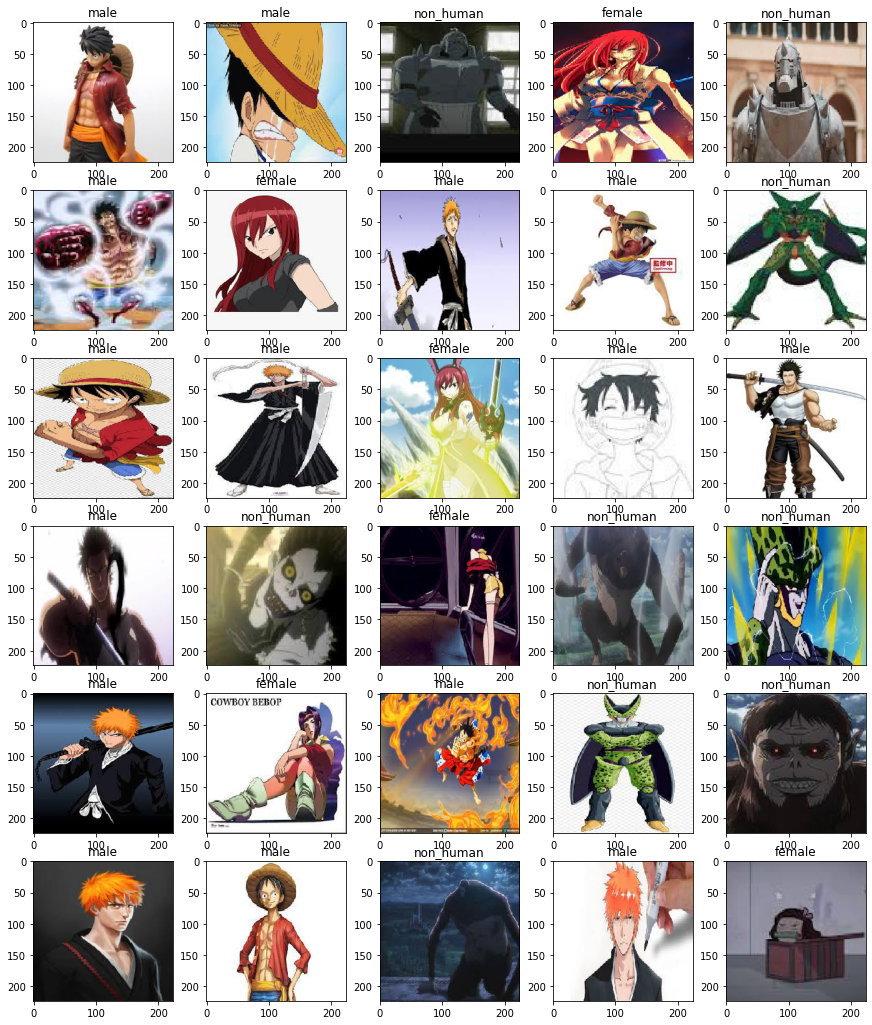

In [ ]:
image_plot(rows=6, batch=train_batches)

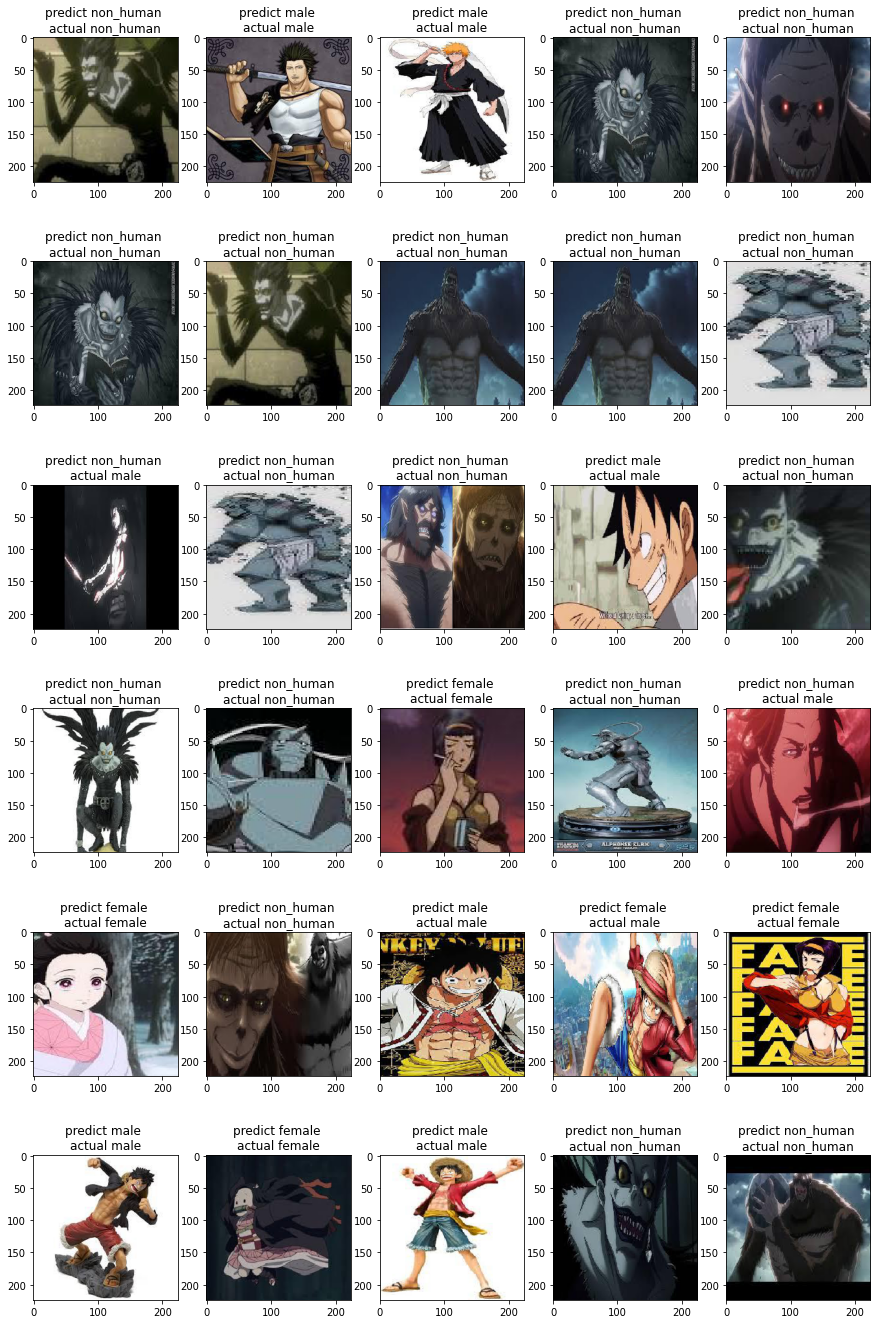

In [ ]:
image_plot_predict(rows=6, batch=test_batches, model=type_class)

In [ ]:
wrong, ximages, correct = missed(test_batches,type_class,classses)

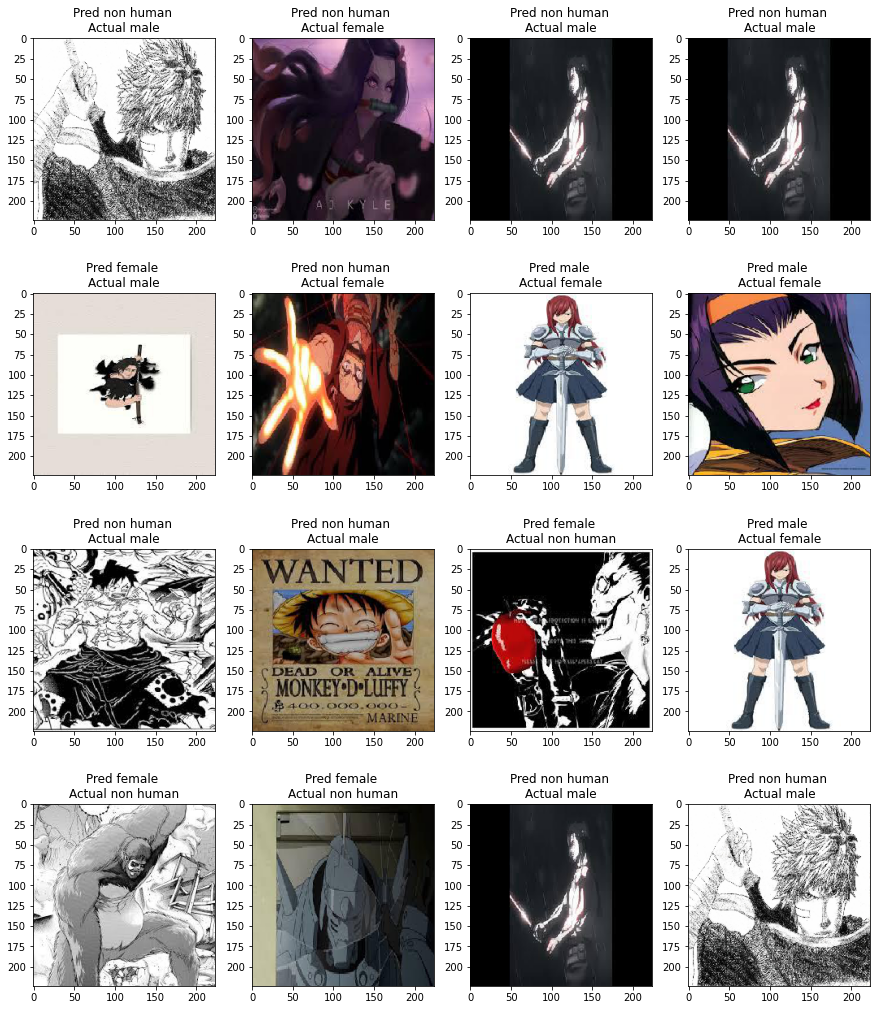

In [ ]:
ig, axs = plt.subplots(4, 4, figsize=(15, 18))
k = 0
for i in range(4):
    for j in range(4):
        axs[i,j].imshow(ximages[k]/255)
        title = f"Pred {wrong[k]} \nActual {correct[k]}"
        axs[i,j].set_title(title)
        k+=1

# Confusion Matric, Heatmap, Clustermap, and model performance


In [ ]:
pred, actual = result(test_batches, type_class)

In [ ]:
cm = confusion_matrix(actual,pred, normalize= 'true')

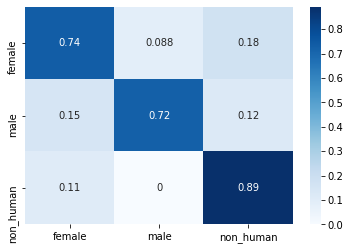

In [ ]:
sns.heatmap(cm, annot=True,yticklabels=classses,xticklabels=classses, cmap="Blues")

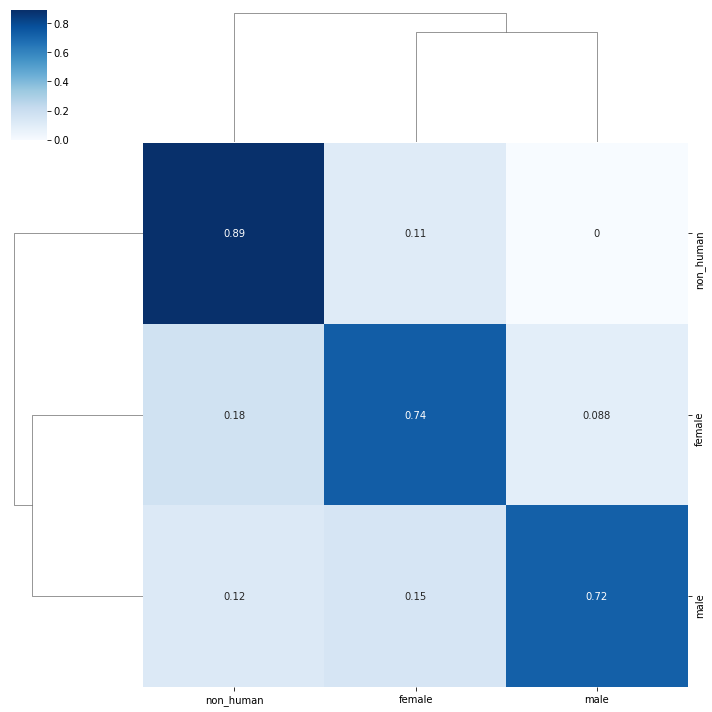

In [ ]:
sns.clustermap(cm, annot=True,yticklabels=classses,xticklabels=classses, cmap="Blues")

In [ ]:
score = classification_report(actual, pred, output_dict= True)

In [ ]:
pd.DataFrame(score).T

,precision,recall,f1-score,support
0,0.694444,0.735294,0.714286,34.000000
1,0.906250,0.725000,0.805556,40.000000
2,0.788462,0.891304,0.836735,46.000000
accuracy,0.791667,0.791667,0.791667,0.791667
macro avg,0.796385,0.783866,0.785525,120.000000
weighted avg,0.801086,0.791667,0.791648,120.000000


In [ ]:
def galplot(chart):
    rendered_chart = chart.render(is_unicode=True)
    plot_html = base_html.format(rendered_chart=rendered_chart)
    display(HTML(plot_html))

In [ ]:
labels = np.unique(actual)
dot_chart = pygal.Dot(x_label_rotation=30, interpolate='cubic')
dot_chart.title = 'Confusion Matrix'
dot_chart.x_labels = ['Male', 'Female', 'Non_human']
dot_chart.x_title = "Predicted"
dot_chart.y_title = "Actual"
dot_chart.add('Male', cm[0])
dot_chart.add('Female', cm[1])
dot_chart.add('Non_human', cm[2])
galplot(dot_chart)
dot_chart.render_to_file('confu.svg')
dot_chart.render_to_png('output1/Confu.png') 




In [ ]:
gauge_chart = pygal.Gauge(human_readable=True)
gauge_chart.title = 'Model Scores'
gauge_chart.range = [0, 1]
gauge_chart.add('Being Classifier', .96)
gauge_chart.add('Character Classifier', .82)
gauge_chart.add('Anime Classifier', .62)
gauge_chart.render_pyquery()
galplot(gauge_chart)
gauge_chart.render_to_file('bar_chart.svg') 
gauge_chart.render_to_png('output1/chart.png')

In [ ]:
line_chart = pygal.Bar()
line_chart.title = 'Model Scores'
line_chart.x_labels = ['Accuracy','Precision']
line_chart.add('Type',[.92, 0.869541])
line_chart.add('Anime',[.62, 0.663892])
line_chart.add('Char',[.82, 0.630019])

line_chart.render_to_png('bar.png')
galplot(line_chart)
